In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
from pathlib import Path
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
import keras
from keras.models import Sequential
from tensorflow import metrics
from sklearn.metrics import confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

**Step 1:**  
Convert audio files into PNG format images (or extracting the Spectrogram for every audio file)

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
# pathlib.Path(f'/image_data').
path = Path('/Users/netan/PycharmProjects/Fallkall/Data/')
path_image = path_audio / 'image_data'
path_image.mkdir(parents=True, exist_ok=True) 
path = Path('/Users/netan/PycharmProjects/Fallkall/Data/Audio')
for file_name in os.listdir(path):
    file_path = f'/Users/netan/PycharmProjects/Fallkall/Data/Audio/{filename}'
    audio, sample_rate = librosa.core.load(file_path, mono=True)
    plt.specgram(audio, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    plt.savefig(f'{path_image}/{file_name[:-3].replace(".", "")}.png')
    plt.clf()

**Step 2:**     
Creating a header for the CSV file.

In [ ]:
header = 'file_name chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' classified'
header = header.split()
# header

**Step 3:**   
Extracting features from Spectogram such as  Mel-frequency cepstral coefficients (MFCC), Spectral Centroid, Zero Crossing Rate, Chroma Frequencies, and Spectral Roll-off.

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    for file_name in os.listdir(path):
            file_path = f'/Users/netan/PycharmProjects/Fallkall/Data/Audio/{file_name}'
            audio, sample_rate = librosa.load(file_path, mono=True)
            rms = librosa.feature.rms(y=audio)
            chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
            spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
            spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
            rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)
            zcr = librosa.feature.zero_crossing_rate(y=audio)
            mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate)
            to_append = f'{file_name} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += ' true' if 'not' not in file_name else ' false'
#             print()
#             print(to_append)
#             print()
            file = open('dataset.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('dataset.csv')
data = data.drop(data.index[0])
data = data.sample(frac=1)
# data.head(50)
data = data.drop(['file_name'],axis=1)

In [ ]:
# data.dtypes

**Step 4:**  
Data preprocessing: It involves loading CSV data, label encoding, feature scaling and data split into training and test set.

In [ ]:
#Encoding the Labels
hasFallen = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(hasFallen) #Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float)) #Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Step 5:**    
Building an ANN model.

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Step 6:**   
Fit the model.

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=128)

In [ ]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
joblib.dump(model,'trained_model.joblib')

In [ ]:
ans = model.predict(X_test)

In [ ]:
ans2 = np.zeros(len(ans))
for i in range(len(ans)):
#     print(ans[i][0], "---", ans[i][1])
    if ans[i][0] > ans[i][1]:
        ans2[i] = 0
    else:
        ans2[i] = 1

In [ ]:
sns.heatmap(confusion_matrix(y_test, ans2), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
ans = model.predict(X_test)

In [ ]:
ans2 = np.zeros(len(ans))
for i in range(len(ans)):
#     print(ans[i][0], "---", ans[i][1])
    if ans[i][0] > ans[i][1]:
        ans2[i] = 0
    else:
        ans2[i] = 1

In [ ]:
sns.heatmap(confusion_matrix(y_test, ans2), cmap = "Blues", annot=True, fmt = '.0f')

In [194]:
ans2 = np.zeros(len(ans))
for i in range(len(ans)):
#     print(ans[i][0], "---", ans[i][1])
    if ans[i][0] > ans[i][1]:
        ans2[i] = 0
    else:
        ans2[i] = 1

<AxesSubplot:>

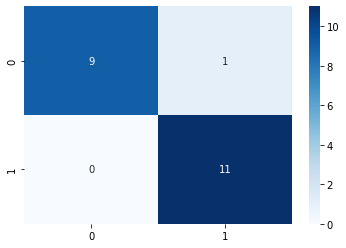

In [195]:
sns.heatmap(confusion_matrix(y_test, ans2), cmap = "Blues", annot=True, fmt = '.0f')